In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
sentences=[
    'i love my dog',
    'I, love my cat',
    'you love my dog!',
    'Do you think my dog is amazing?'
]
tokenizer=Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'my': 1,
 'love': 2,
 'dog': 3,
 'i': 4,
 'you': 5,
 'cat': 6,
 'do': 7,
 'think': 8,
 'is': 9,
 'amazing': 10}

In [4]:
sequences = tokenizer.texts_to_sequences(sentences)
print("Sequences before padding : ",sequences)
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded = pad_sequences(sequences,maxlen=5)
print("Sequences after padding : \n",padded)


Sequences before padding :  [[4, 2, 1, 3], [4, 2, 1, 6], [5, 2, 1, 3], [7, 5, 8, 1, 3, 9, 10]]
Sequences after padding : 
 [[ 0  4  2  1  3]
 [ 0  4  2  1  6]
 [ 0  5  2  1  3]
 [ 8  1  3  9 10]]


In [5]:
labeled_sentences = {
    "sentences":[
        "This movie was excellent",
        "The food was terrible",
        "What a wonderful day",
        "I had a really bad experience",
        "She did a great job",
        "The service was poor",
        "This is a good book",
        "He made a big mistake",
        "Such a beautiful view",
        "I feel unwell"
    ],
    "lebel":[
        "bon",
        "mauvais",
        "bon",
        "mauvais",
        "bon",
        "mauvais",
        "bon",
        "mauvais",
        "bon",
        "mauvais"
    ]
}



In [6]:
import pandas as pd
df = pd.DataFrame(labeled_sentences)
df

,sentences,lebel
0,This movie was excellent,bon
1,The food was terrible,mauvais
2,What a wonderful day,bon
3,I had a really bad experience,mauvais
4,She did a great job,bon
5,The service was poor,mauvais
6,This is a good book,bon
7,He made a big mistake,mauvais
8,Such a beautiful view,bon
9,I feel unwell,mauvais


In [7]:
tokenizer_classifier = Tokenizer(num_words=100,oov_token="<OOV>")
tokenizer_classifier.fit_on_texts(df['sentences'])
word_index_classifier = tokenizer_classifier.word_index
word_index_classifier

{'<OOV>': 1,
 'a': 2,
 'was': 3,
 'this': 4,
 'the': 5,
 'i': 6,
 'movie': 7,
 'excellent': 8,
 'food': 9,
 'terrible': 10,
 'what': 11,
 'wonderful': 12,
 'day': 13,
 'had': 14,
 'really': 15,
 'bad': 16,
 'experience': 17,
 'she': 18,
 'did': 19,
 'great': 20,
 'job': 21,
 'service': 22,
 'poor': 23,
 'is': 24,
 'good': 25,
 'book': 26,
 'he': 27,
 'made': 28,
 'big': 29,
 'mistake': 30,
 'such': 31,
 'beautiful': 32,
 'view': 33,
 'feel': 34,
 'unwell': 35}

In [8]:
sequences_classifier = tokenizer_classifier.texts_to_sequences(df['sentences'])
sequences_classifier

[[4, 7, 3, 8],
 [5, 9, 3, 10],
 [11, 2, 12, 13],
 [6, 14, 2, 15, 16, 17],
 [18, 19, 2, 20, 21],
 [5, 22, 3, 23],
 [4, 24, 2, 25, 26],
 [27, 28, 2, 29, 30],
 [31, 2, 32, 33],
 [6, 34, 35]]

In [9]:
padded_classifier = pad_sequences(sequences_classifier,maxlen=6,padding='post')
df['tokenized_sentences'] = padded_classifier.tolist()

In [10]:
df['label']=df['lebel'].map({'bon':1,'mauvais':0})

In [11]:
df

,sentences,lebel,tokenized_sentences,label
0,This movie was excellent,bon,"[4, 7, 3, 8, 0, 0]",1
1,The food was terrible,mauvais,"[5, 9, 3, 10, 0, 0]",0
2,What a wonderful day,bon,"[11, 2, 12, 13, 0, 0]",1
3,I had a really bad experience,mauvais,"[6, 14, 2, 15, 16, 17]",0
4,She did a great job,bon,"[18, 19, 2, 20, 21, 0]",1
5,The service was poor,mauvais,"[5, 22, 3, 23, 0, 0]",0
6,This is a good book,bon,"[4, 24, 2, 25, 26, 0]",1
7,He made a big mistake,mauvais,"[27, 28, 2, 29, 30, 0]",0
8,Such a beautiful view,bon,"[31, 2, 32, 33, 0, 0]",1
9,I feel unwell,mauvais,"[6, 34, 35, 0, 0, 0]",0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(df['tokenized_sentences'], df['label'], test_size=0.2, random_state=42)
history = model.fit(X_train.tolist(), y_train)


In [13]:
!pip3 install gdown

!gdown --id 1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xRU3xY5-tkiPGvlz5xBJ18_pHWSRzI4v
To: /content/sarcasm.json
100% 5.64M/5.64M [00:00<00:00, 37.9MB/s]


In [14]:
df = pd.read_json('/content/sarcasm.json')
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [15]:
df.drop(columns='article_link',inplace=True)

In [16]:
df

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


# Task
Preprocess the 'headline' column in the `df` DataFrame by removing English stopwords, then tokenize the cleaned text using a Keras Tokenizer, ensuring stopwords are excluded from the tokenizer's vocabulary, and finally convert the cleaned headlines into sequences of integers.

## Define and Prepare Stopwords

### Subtask:
Import NLTK (if not already available) and define a list of common English stopwords.


**Reasoning**:
The subtask requires importing NLTK, downloading the stopwords corpus, importing stopwords, and then defining a list of common English stopwords. This code block will perform all these steps.



In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')
print(f"Number of English stopwords: {len(english_stopwords)}")
print(f"First 10 English stopwords: {english_stopwords[:10]}")

Number of English stopwords: 198
First 10 English stopwords: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Reasoning**:
The next logical step is to clean the 'headline' column in the `df` DataFrame by removing the previously defined English stopwords. This will involve converting headlines to lowercase, splitting them into words, filtering out stopwords, and then rejoining the words to form cleaned headlines.



In [18]:
def remove_stopwords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in english_stopwords]
    return " ".join(filtered_words)

df['cleaned_headline'] = df['headline'].apply(remove_stopwords)
print("Original Headline examples:")
print(df['headline'].head())
print("\nCleaned Headline examples (stopwords removed):")
print(df['cleaned_headline'].head())

Original Headline examples:
0    former versace store clerk sues over secret 'b...
1    the 'roseanne' revival catches up to our thorn...
2    mom starting to fear son's web series closest ...
3    boehner just wants wife to listen, not come up...
4    j.k. rowling wishes snape happy birthday in th...
Name: headline, dtype: object

Cleaned Headline examples (stopwords removed):
0    former versace store clerk sues secret 'black ...
1    'roseanne' revival catches thorny political mo...
2    mom starting fear son's web series closest thi...
3    boehner wants wife listen, come alternative de...
4    j.k. rowling wishes snape happy birthday magic...
Name: cleaned_headline, dtype: object


In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer with an OOV token and a vocabulary size (if desired)
# The number of words can be set to None to consider all words, or a specific number.
# Here, we will let it learn from all words in the cleaned headlines.
tokenizer_cleaned = Tokenizer(oov_token="<OOV>")

# Fit the tokenizer on the cleaned headlines
tokenizer_cleaned.fit_on_texts(df['cleaned_headline'])

# Get the word index
word_index_cleaned = tokenizer_cleaned.word_index

print(f"Found {len(word_index_cleaned)} unique tokens.")
print("First 10 words in the vocabulary:")
# Print the first 10 items in the word index for inspection
for i, (word, index) in enumerate(word_index_cleaned.items()):
    if i >= 10:
        break
    print(f"{word}: {index}")

Found 29571 unique tokens.
First 10 words in the vocabulary:
<OOV>: 1
new: 2
trump: 3
man: 4
one: 5
report: 6
year: 7
area: 8
donald: 9
u: 10


In [20]:
sequences_cleaned = tokenizer_cleaned.texts_to_sequences(df['cleaned_headline'])
df['tokenized_cleaned_headline'] = sequences_cleaned

print("First 5 cleaned headlines as integer sequences:")
for i, seq in enumerate(sequences_cleaned[:5]):
    print(f"Headline {i+1}: {seq}")


First 5 cleaned headlines as integer sequences:
Headline 1: [215, 15028, 570, 3228, 2187, 286, 2466, 15029, 2467, 8335]
Headline 2: [8336, 3229, 2635, 8337, 317, 3003, 170, 898]
Headline 3: [75, 731, 803, 1637, 1981, 474, 4616, 137, 10643]
Headline 4: [1377, 139, 301, 1718, 226, 2813, 1285, 6862, 865]
Headline 5: [659, 610, 4617, 804, 10644, 512, 486, 1202, 36]


In [21]:
df.head()

,headline,is_sarcastic,cleaned_headline,tokenized_cleaned_headline
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret 'black ...,"[215, 15028, 570, 3228, 2187, 286, 2466, 15029..."
1,the 'roseanne' revival catches up to our thorn...,0,'roseanne' revival catches thorny political mo...,"[8336, 3229, 2635, 8337, 317, 3003, 170, 898]"
2,mom starting to fear son's web series closest ...,1,mom starting fear son's web series closest thi...,"[75, 731, 803, 1637, 1981, 474, 4616, 137, 10643]"
3,"boehner just wants wife to listen, not come up...",1,"boehner wants wife listen, come alternative de...","[1377, 139, 301, 1718, 226, 2813, 1285, 6862, ..."
4,j.k. rowling wishes snape happy birthday in th...,0,j.k. rowling wishes snape happy birthday magic...,"[659, 610, 4617, 804, 10644, 512, 486, 1202, 36]"


In [22]:
new_df = pd.DataFrame(data=df[['is_sarcastic','tokenized_cleaned_headline']])
new_df.head()

,is_sarcastic,tokenized_cleaned_headline
0,0,"[215, 15028, 570, 3228, 2187, 286, 2466, 15029..."
1,0,"[8336, 3229, 2635, 8337, 317, 3003, 170, 898]"
2,1,"[75, 731, 803, 1637, 1981, 474, 4616, 137, 10643]"
3,1,"[1377, 139, 301, 1718, 226, 2813, 1285, 6862, ..."
4,0,"[659, 610, 4617, 804, 10644, 512, 486, 1202, 36]"


# Task
Apply padding to the `tokenized_cleaned_headline` sequences in the `df` DataFrame, ensuring a uniform length of 50, to prepare them for model input.

## Pad Tokenized Sequences

### Subtask:
Apply padding to the `tokenized_cleaned_headline` sequences in the `df` DataFrame, ensuring a uniform length, making them suitable for model input.


**Reasoning**:
The subtask requires padding the tokenized sequences. This involves importing `pad_sequences`, applying it to the `tokenized_cleaned_headline` column with specified parameters, storing the result in a new column, and then displaying the updated DataFrame to verify the changes.



In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Apply padding to the tokenized_cleaned_headline sequences
padded_headlines = pad_sequences(df['tokenized_cleaned_headline'], maxlen=50, padding='post')

# Store the resulting padded sequences in a new column
df['padded_headlines'] = list(padded_headlines)

# Display the first few rows of the updated df DataFrame
print("DataFrame with padded_headlines column:")
df.head()

DataFrame with padded_headlines column:


,headline,is_sarcastic,cleaned_headline,tokenized_cleaned_headline,padded_headlines
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues secret 'black ...,"[215, 15028, 570, 3228, 2187, 286, 2466, 15029...","[215, 15028, 570, 3228, 2187, 286, 2466, 15029..."
1,the 'roseanne' revival catches up to our thorn...,0,'roseanne' revival catches thorny political mo...,"[8336, 3229, 2635, 8337, 317, 3003, 170, 898]","[8336, 3229, 2635, 8337, 317, 3003, 170, 898, ..."
2,mom starting to fear son's web series closest ...,1,mom starting fear son's web series closest thi...,"[75, 731, 803, 1637, 1981, 474, 4616, 137, 10643]","[75, 731, 803, 1637, 1981, 474, 4616, 137, 106..."
3,"boehner just wants wife to listen, not come up...",1,"boehner wants wife listen, come alternative de...","[1377, 139, 301, 1718, 226, 2813, 1285, 6862, ...","[1377, 139, 301, 1718, 226, 2813, 1285, 6862, ..."
4,j.k. rowling wishes snape happy birthday in th...,0,j.k. rowling wishes snape happy birthday magic...,"[659, 610, 4617, 804, 10644, 512, 486, 1202, 36]","[659, 610, 4617, 804, 10644, 512, 486, 1202, 3..."


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. Extract 'padded_headlines' and convert to NumPy array (X)
X = np.array(df['padded_headlines'].tolist())

# 2. Extract 'is_sarcastic' and convert to NumPy array (y)
y = np.array(df['is_sarcastic'].tolist())

# 4. Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Print the shapes of the resulting arrays to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (21367, 50)
Shape of X_test: (5342, 50)
Shape of y_train: (21367,)
Shape of y_test: (5342,)


In [25]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model_logistic = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model using X_train and y_train
model_logistic.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the Logistic Regression model
model_logistic = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

# Train the model using scaled X_train and y_train
history = model_logistic.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully (with scaled data).")

Logistic Regression model trained successfully (with scaled data).


In [27]:
model_logistic.predict(X_test_scaled)

array([0, 0, 1, ..., 0, 0, 0])

In [28]:
y_pred = model_logistic.predict(X_test_scaled)
print(f"Predicted labels for the first 10 test samples: {y_pred[:10]}")

Predicted labels for the first 10 test samples: [0 0 1 0 0 0 0 0 0 0]


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.5764
Precision: 0.5759
Recall: 0.1343
F1-score: 0.2178


# Task
Prepare data for the Keras model by determining the vocabulary size and input sequence length from the previously tokenized and padded headlines, then define, build, compile, train, and evaluate a Sequential Keras model for binary classification using an `Embedding` layer, `GlobalAveragePooling1D` layer, and `Dense` layers on the `X_train`, `y_train`, `X_test`, and `y_test` datasets.

## Prepare Data for Keras Model

### Subtask:
Ensure the vocabulary size and input sequence length are correctly determined from the tokenizer and padding step for the Keras Embedding layer.


**Reasoning**:
The subtask requires determining the vocabulary size and input sequence length for the Keras Embedding layer. The vocabulary size can be derived from the `word_index_cleaned` and the input sequence length from the `maxlen` used during padding.



In [30]:
vocab_size = len(tokenizer_cleaned.word_index) + 1
embedding_dim = df['padded_headlines'].apply(len).max()

print(f"Vocabulary Size: {vocab_size}")
print(f"Input Sequence Length (embedding_dim): {embedding_dim}")

Vocabulary Size: 29572
Input Sequence Length (embedding_dim): 50


## Define and Build Keras Model with Embedding Layer

### Subtask:
Construct a Sequential Keras model starting with an `Embedding` layer, followed by a `GlobalAveragePooling1D` layer, and then `Dense` layers for binary classification.


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Initialize the Sequential model
model = Sequential()

# Add an Embedding layer
# vocab_size is from the previous step
# output_dim can be adjusted, common values are 16, 32, 64, etc.
# input_length is removed as it is deprecated and inferred from input
model.add(Embedding(vocab_size, 16))

# Add a GlobalAveragePooling1D layer to flatten the embeddings
model.add(GlobalAveragePooling1D())

# Add a Dense layer with ReLU activation
model.add(Dense(24, activation='relu'))

# Add the output Dense layer for binary classification with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Print the model summary to review the architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
Now that the Keras model architecture is defined, the next step is to compile it. This involves specifying the optimizer, loss function, and metrics for the training process.



In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Keras model compiled successfully.")

Keras model compiled successfully.


**Reasoning**:
With the Keras model defined and compiled, the next step is to train it using the prepared training data (`X_train`, `y_train`) and validate it with the test data (`X_test`, `y_test`).



In [33]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print("Keras model trained successfully.")

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5615 - loss: 0.6846 - val_accuracy: 0.5646 - val_loss: 0.6619
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6760 - loss: 0.6135 - val_accuracy: 0.7757 - val_loss: 0.4865
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8331 - loss: 0.4125 - val_accuracy: 0.7186 - val_loss: 0.5704
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8722 - loss: 0.3196 - val_accuracy: 0.8061 - val_loss: 0.4125
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9063 - loss: 0.2450 - val_accuracy: 0.8070 - val_loss: 0.4126
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9238 - loss: 0.2035 - val_accuracy: 0.8066 - val_loss: 0.4314
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9396 - loss: 0.1679 - val_accuracy: 0.8081 - val_loss: 0.4443
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9514 - loss: 0.1394 - val_accuracy: 

**Reasoning**:
The Keras model has been trained. The final step is to evaluate its performance on the test data to assess its accuracy and loss, thereby completing the subtask of training and evaluating the model.



In [34]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.5482
Test Loss: 0.5590
Test Accuracy: 0.7982


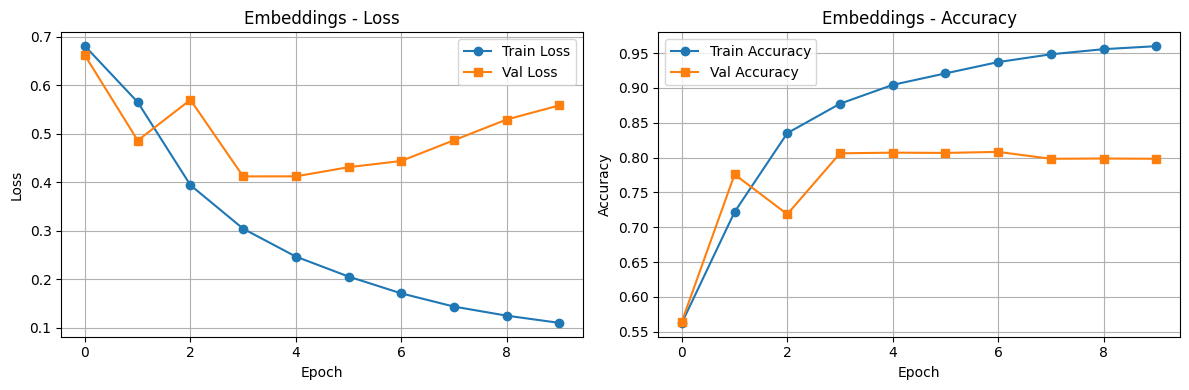

✓ Embeddings complété !


In [54]:
# Visualiser les courbes Embeddings
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['loss'], label='Train Loss', marker='o')
axes[0].plot(history.history['val_loss'], label='Val Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Embeddings - Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history.history['accuracy'], label='Train Accuracy', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Embeddings - Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("✓ Embeddings complété !")

# Task
Define, compile, train, and evaluate two separate Keras Sequential models for binary classification on the `X_train`, `y_train`, `X_test`, and `y_test` datasets: one using an Embedding layer, an LSTM layer, and Dense layers, and another using an Embedding layer, a GRU layer, and Dense layers.

## Define, Compile, Train, and Evaluate LSTM Model

### Subtask:
Construct, compile, train, and evaluate a Sequential Keras model using an Embedding layer, an LSTM layer, and Dense layers for binary classification on the `X_train`, `y_train`, `X_test`, and `y_test` datasets.


**Reasoning**:
The subtask requires defining the Keras Sequential model with Embedding, LSTM, and Dense layers. This step will import the necessary components and construct the model architecture.



In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Initialize the Sequential model
model_lstm = Sequential()

# Add an Embedding layer
# vocab_size and embedding_dim are from the previous steps
model_lstm.add(Embedding(vocab_size, 16)) # Removed input_length as it is deprecated

# Add an LSTM layer
model_lstm.add(LSTM(32))

# Add a Dense layer with ReLU activation
model_lstm.add(Dense(24, activation='relu'))

# Add the output Dense layer for binary classification with sigmoid activation
model_lstm.add(Dense(1, activation='sigmoid'))

# Print the model summary to review the architecture
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The Keras LSTM model architecture has been defined. The next step is to compile the model, specifying the optimizer, loss function, and metrics for training.



In [42]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Keras LSTM model compiled successfully.")

Keras LSTM model compiled successfully.


**Reasoning**:
With the Keras LSTM model compiled, the next logical step is to train it using the prepared training data (`X_train`, `y_train`) and validate it with the test data (`X_test`, `y_test`).



In [43]:
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
print("Keras LSTM model trained successfully.")

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.5640 - loss: 0.6864 - val_accuracy: 0.5608 - val_loss: 0.6867
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5692 - loss: 0.6837 - val_accuracy: 0.5608 - val_loss: 0.6859
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5626 - loss: 0.6855 - val_accuracy: 0.5608 - val_loss: 0.6857
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5556 - loss: 0.6872 - val_accuracy: 0.5608 - val_loss: 0.6857
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5590 - loss: 0.6864 - val_accuracy: 0.5608 - val_loss: 0.6862
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.5778 - loss: 0.6760 - val_accuracy: 0.7359 - val_loss: 0.5781
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.6884 - loss: 0.5822 - val_accuracy: 0.6084 - val_loss: 0.6196
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.6296 - loss: 0.6032 - 

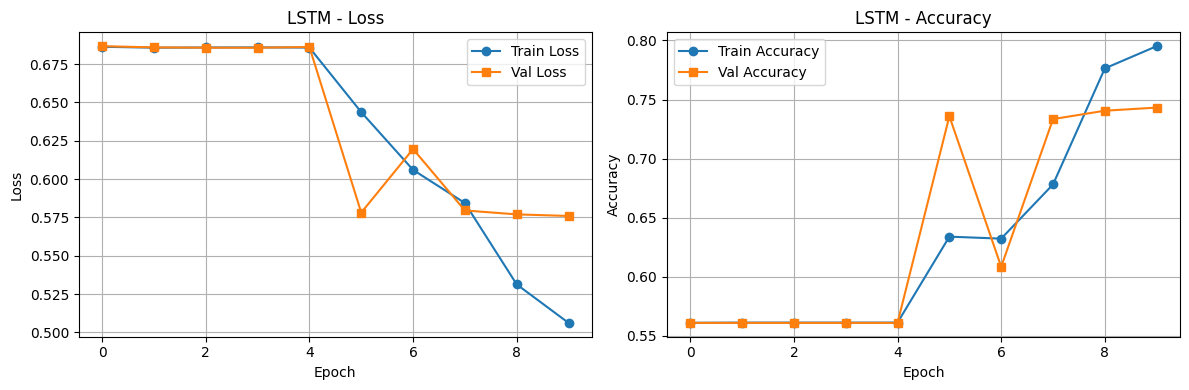

✓ LSTM complété !


In [55]:
# Visualiser les courbes LSTM
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history_lstm.history['loss'], label='Train Loss', marker='o')
axes[0].plot(history_lstm.history['val_loss'], label='Val Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('LSTM - Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_lstm.history['accuracy'], label='Train Accuracy', marker='o')
axes[1].plot(history_lstm.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('LSTM - Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("✓ LSTM complété !")

# Task
Define, compile, train, and evaluate a Sequential Keras model for binary classification using an Embedding layer, a GRU layer, and Dense layers on the `X_train`, `y_train`, `X_test`, and `y_test` datasets.

## Define GRU Model Architecture

### Subtask:
Construct a Sequential Keras model using an Embedding layer, a GRU layer, and Dense layers for binary classification, similar to the LSTM model.


**Reasoning**:
The subtask requires defining a Keras Sequential model with Embedding, GRU, and Dense layers. This step will import the necessary components and construct the model architecture.



In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Initialize the Sequential model
model_gru = Sequential()

# Add an Embedding layer
# vocab_size and embedding_dim are from the previous steps
model_gru.add(Embedding(vocab_size, 16))

# Add a GRU layer
model_gru.add(GRU(32))

# Add a Dense layer with ReLU activation
model_gru.add(Dense(24, activation='relu'))

# Add the output Dense layer for binary classification with sigmoid activation
model_gru.add(Dense(1, activation='sigmoid'))

# Print the model summary to review the architecture
model_gru.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The Keras GRU model architecture has been defined. The next step is to compile the model, specifying the optimizer, loss function, and metrics for training.



In [45]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Keras GRU model compiled successfully.")

Keras GRU model compiled successfully.


**Reasoning**:
With the Keras GRU model compiled, the next logical step is to train it using the prepared training data (`X_train`, `y_train`) and validate it with the test data (`X_test`, `y_test`).



In [58]:
history_gru = model_gru.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
print("Keras GRU model trained successfully.")

Epoch 1/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.5754 - loss: 0.6821 - val_accuracy: 0.5608 - val_loss: 0.6858
Epoch 2/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.5581 - loss: 0.6865 - val_accuracy: 0.5608 - val_loss: 0.6857
Epoch 3/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.5620 - loss: 0.6855 - val_accuracy: 0.5608 - val_loss: 0.6862
Epoch 4/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.5612 - loss: 0.6858 - val_accuracy: 0.5608 - val_loss: 0.6857
Epoch 5/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.5577 - loss: 0.6866 - val_accuracy: 0.5608 - val_loss: 0.6859
Epoch 6/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.5585 - loss: 0.6864 - val_accuracy: 0.5608 - val_loss: 0.6857
Epoch 7/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.5593 - loss: 0.6862 - val_accuracy: 0.5608 - val_loss: 0.6858
Epoch 8/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.5602 - loss: 0.6860 - 

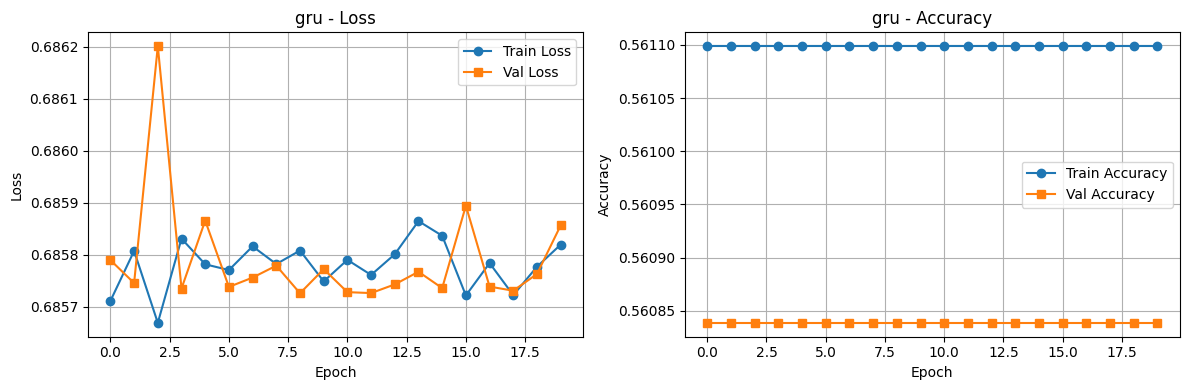

✓ gru complété !


In [59]:
# Visualiser les courbes gru
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history_gru.history['loss'], label='Train Loss', marker='o')
axes[0].plot(history_gru.history['val_loss'], label='Val Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('gru - Loss')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_gru.history['accuracy'], label='Train Accuracy', marker='o')
axes[1].plot(history_gru.history['val_accuracy'], label='Val Accuracy', marker='s')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('gru - Accuracy')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("✓ gru complété !")